## Libraries

In [ ]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns
import pandas as pd

from matplotlib import rcParams
from sklearn.datasets import load_boston

# special matplotlib argument for improved plots
sns.set_style("darkgrid")
sns.set_context("poster")

<br>
<br>

## Boston Data Set

In [ ]:
boston = load_boston()
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<br>
<br>

### Pair Plots

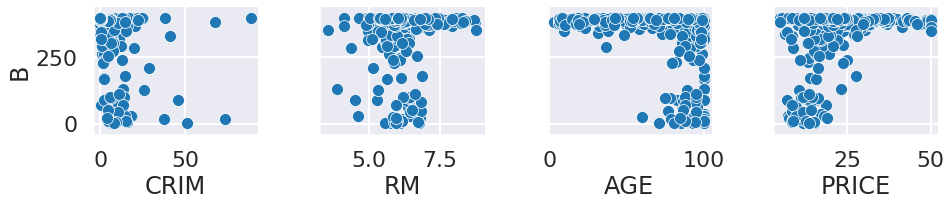

In [ ]:
sns.pairplot(bos, hue=None, y_vars=['B'], x_vars=['CRIM', 'RM', 'AGE', 'PRICE'], kind='scatter', diag_kind='auto', height=3.5, aspect=1, 
             dropna=True, plot_kws=None, diag_kws=None, grid_kws=None, size=None)

<br>
<br>

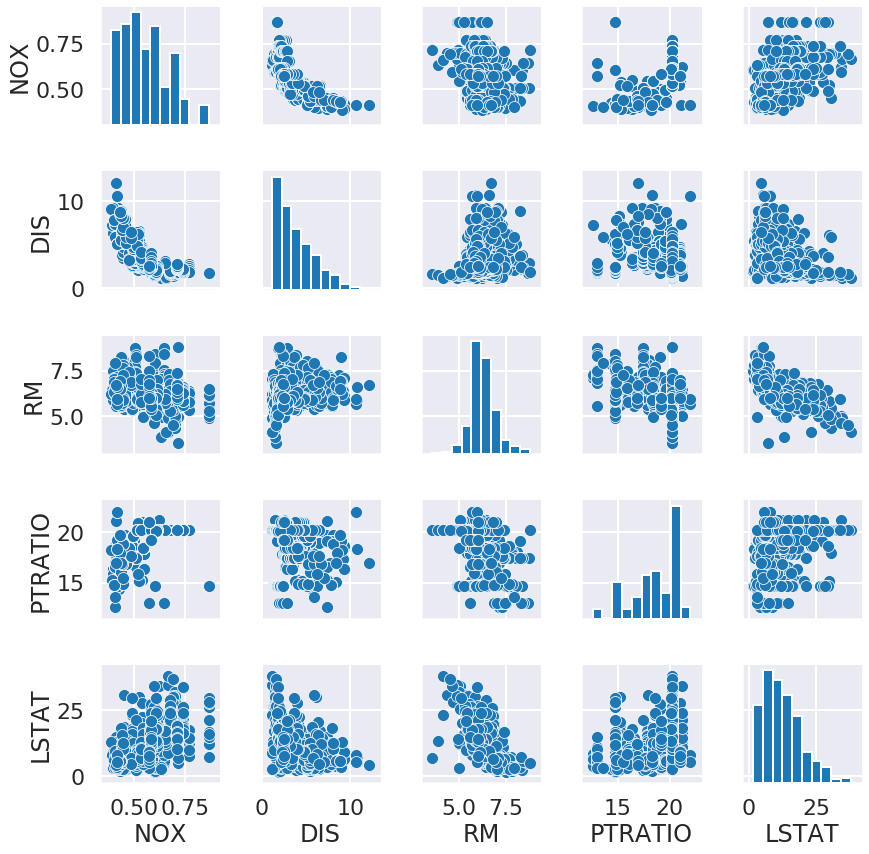

In [ ]:
sns.pairplot(bos, hue=None, y_vars=['NOX', 'DIS', 'RM', 'PTRATIO', 'LSTAT'], 
             x_vars=['NOX', 'DIS', 'RM', 'PTRATIO', 'LSTAT'], kind='scatter', 
             diag_kind='auto', markers=None)

<br>
<br>

Exploring:

```python
sns.pairplot(bos, hue=None, x_vars=['RAD', 'TAX', 'CHAS'], y_vars=['PRICE'], kind='scatter', 
             diag_kind='auto', markers=None, height=3.5, aspect=1, 
             dropna=True, plot_kws=None, diag_kws=None, grid_kws=None, size=None)
```

```python
sns.pairplot(bos, hue=None, x_vars=['AGE', 'NOX', 'LSTAT', 'B'], y_vars=['PRICE'], kind='scatter', 
             diag_kind='auto', markers=None, height=3.5, aspect=1, 
             dropna=True, plot_kws=None, diag_kws=None, grid_kws=None, size=None)
```

```python
sns.pairplot(bos, hue=None, kind='scatter', 
             diag_kind='auto', markers=None, height=3.5, aspect=1, 
             dropna=True, plot_kws=None, diag_kws=None, grid_kws=None, size=None)
```


<br>
<br>

### Scaling

<br>

#### Scale

In [ ]:
# sklearn.preprocessing.scale(bos[['RM', 'PTRATIO', 'LSTAT', 'NOX']], axis=0)
# scaler = sklearn.preprocessing.MinMaxScaler()
# scaler.fit_transform(bos[['RM', 'PTRATIO', 'LSTAT', 'NOX']].to_numpy())


F = pd.DataFrame( sklearn.preprocessing.scale(bos[['RM', 'PTRATIO', 'LSTAT', 'NOX']], axis=0), 
                 columns={'RM', 'PTRATIO', 'LSTAT', 'NOX'} )
F.head()

,PTRATIO,NOX,LSTAT,RM
0,0.413672,-1.459000,-1.075562,-0.144217
1,0.194274,-0.303094,-0.492439,-0.740262
2,1.282714,-0.303094,-1.208727,-0.740262
3,1.016303,0.113032,-1.361517,-0.835284
4,1.228577,0.113032,-1.026501,-0.835284


<br>

Histograms

Text(0, 0.5, 'Frequency')

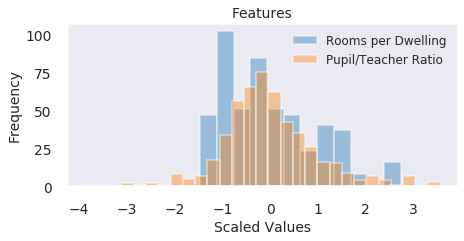

In [ ]:
plt.figure(figsize=(7,3), frameon=False, edgecolor=None)
plt.tick_params(axis='both', labelsize='xx-small')
plt.grid(b=None)

sns.distplot(F['RM'],  kde=False, label='Rooms per Dwelling')
sns.distplot(F['PTRATIO'],  kde=False, label='Pupil/Teacher Ratio')

plt.legend(prop={'size': 12}, loc='upper right', frameon=False)
plt.title('Features', fontsize='xx-small')
plt.xlabel('Scaled Values', fontsize='xx-small')
plt.ylabel('Frequency', fontsize='xx-small')

<br>
<br>

#### MinMaxScale

In [ ]:
scaler = sklearn.preprocessing.MinMaxScaler()
H = pd.DataFrame( scaler.fit_transform( bos[['RM', 'PTRATIO', 'LSTAT', 'NOX', 'PRICE']].to_numpy()) )
H.columns = ['RM', 'PTRATIO', 'LSTAT', 'NOX', 'PRICE']
H.head()

,RM,PTRATIO,LSTAT,NOX,PRICE
0,0.577505,0.287234,0.089680,0.314815,0.422222
1,0.547998,0.553191,0.204470,0.172840,0.368889
2,0.694386,0.553191,0.063466,0.172840,0.660000
3,0.658555,0.648936,0.033389,0.150206,0.631111
4,0.687105,0.648936,0.099338,0.150206,0.693333


In [ ]:
H[['NOX']].head()

,NOX
0,0.314815
1,0.172840
2,0.172840
3,0.150206
4,0.150206


<br>

Histograms

(array([20., 27., 59., 35., 14., 37., 45., 35., 25.,  7., 37., 26., 20.,
        13., 12., 22., 29.,  6., 13.,  8.,  0.,  0.,  0.,  0., 16.]),
 array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
        0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84,
        0.88, 0.92, 0.96, 1.  ]),
 <a list of 25 Patch objects>)

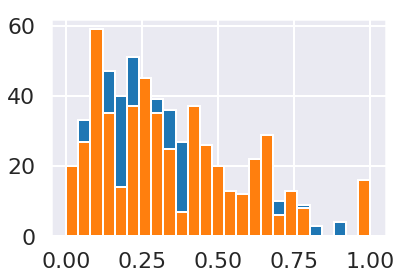

In [ ]:
plt.hist(H['LSTAT'], bins=25, label='% low status population')
plt.hist(H['NOX'], bins=25, label='Nitric Oxides Concentration')

<br>
<br>

### Join Plots

/usr/local/lib/python3.6/dist-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


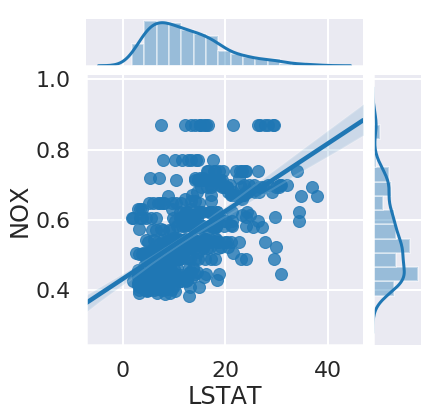

In [ ]:
sns.jointplot(x='LSTAT', y='NOX', data=bos, kind='reg')

<br>
<br>

/usr/local/lib/python3.6/dist-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


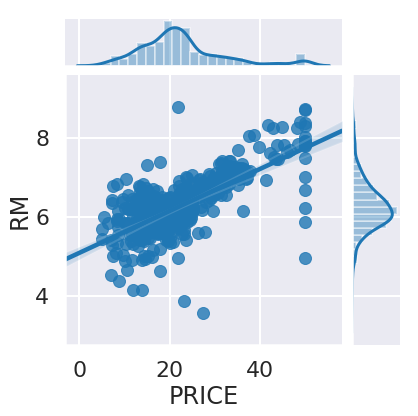

In [ ]:
sns.jointplot(x='PRICE', y='RM', data=bos, kind='reg')